In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [15]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [16]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [33]:
# Find the most recent date in the data set.
# data is sorted chronologically
most_recent = session.query(func.max(measurement.date))[0]
most_recent

('2017-08-23',)

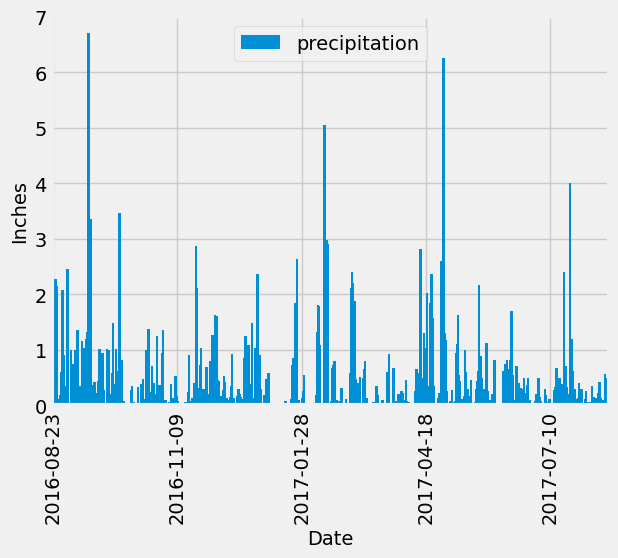

In [92]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
recent_date = dt.date.fromisoformat(session.query(func.max(measurement.date))[0][0])
one_year = recent_date - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
query_res = session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(
    data=query_res
)
# Sort the dataframe by date
prcp_df.sort_values("date", inplace=True)
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(kind="bar", xlabel="Date", ylabel="Inches", ylim=(0, 7), width=10, grid=True)
x_pos = [0, 500, 1000, 1500, 2000]
x_labels=['2016-08-23', '2016-11-09', '2017-01-28', '2017-04-18', '2017-07-10']
plt.xticks(x_pos, x_labels, rotation=90)
plt.show()

In [93]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe(percentiles=[0.25, 0.5, 0.75])

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [85]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.id).count()

9

In [98]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc())
most_active_station = None
for row in station_activity:
    print(row)
    if most_active_station == None:
        most_active_station = row[0]

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [100]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station_temp_data = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == most_active_station)
list(active_station_temp_data)

[(54.0, 85.0, 71.66378066378067)]

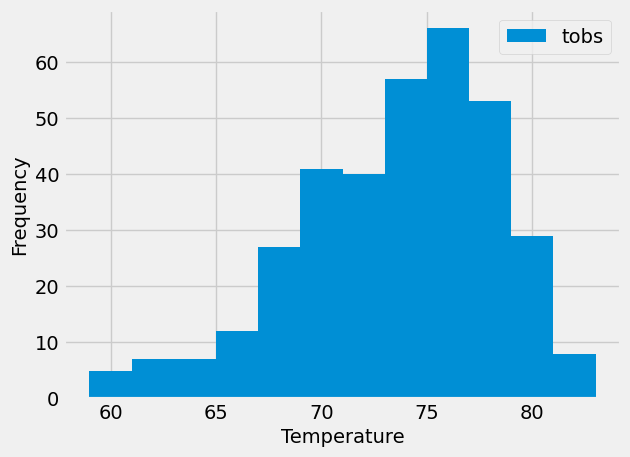

In [106]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_query_res = session.query(measurement.tobs).filter(measurement.station == most_active_station).filter(measurement.date >= one_year)
temp_df = pd.DataFrame(
    data = temp_query_res
)
temp_df.plot(kind="hist", bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

# Close Session

In [16]:
# Close Session
session.close()